In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Allow printing more columns
pd.options.display.width = None
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)

In [3]:
# Do not show pandas warnings
pd.set_option('mode.chained_assignment', None)

In [4]:
df = pd.read_csv('./zadanie2_dataset.csv')

In [5]:
# Print the number of rows and columns
print("Number of rows and columns: ", df.shape)

Number of rows and columns:  (19237, 19)


In [6]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['Levy'])
df = df.drop(columns=['Manufacturer'])
df = df.drop(columns=['Model'])

In [7]:
df = df[(df['Cylinders'] > 3) & (df['Cylinders'] < 13)]
df = df[(df['Price'] >= 500) & (df['Price'] <= 100000)]
df = df[(df['Prod. year'] >= 1992)]
df = df[(df['Engine volume'] >= 1) & (df['Engine volume'] <= 10)]
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)
df = df[(df['Mileage'] >= 0) & (df['Mileage'] <= 500000)]

In [8]:
# Convert boolean columns 'Turbo engine' and 'Left wheel' to int
df['Turbo engine'] = df['Turbo engine'].astype(int)
df['Left wheel'] = df['Left wheel'].astype(int)
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

In [9]:
df = pd.get_dummies(df, columns=['Color'])
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Fuel type'])
df = pd.get_dummies(df, columns=['Gear box type'])
df = pd.get_dummies(df, columns=['Drive wheels'])
df = pd.get_dummies(df, columns=['Doors'])

In [10]:
# remove duplicate rows
df = df.drop_duplicates()

In [11]:
# print the number of rows and columns
print("Number of rows and columns: ", df.shape)

Number of rows and columns:  (14176, 53)


In [12]:
# count the number of null values in each column
print(df.isnull().sum())

Price                       0
Prod. year                  0
Leather interior            0
Engine volume               0
Mileage                     0
Cylinders                   0
Airbags                     0
Turbo engine                0
Left wheel                  0
Color_Beige                 0
Color_Black                 0
Color_Blue                  0
Color_Brown                 0
Color_Carnelian red         0
Color_Golden                0
Color_Green                 0
Color_Grey                  0
Color_Orange                0
Color_Pink                  0
Color_Purple                0
Color_Red                   0
Color_Silver                0
Color_Sky blue              0
Color_White                 0
Color_Yellow                0
Category_Cabriolet          0
Category_Coupe              0
Category_Goods wagon        0
Category_Hatchback          0
Category_Jeep               0
Category_Limousine          0
Category_Microbus           0
Category_Minivan            0
Category_P

In [13]:
# print all columns
print(df.columns)

Index(['Price', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage',
       'Cylinders', 'Airbags', 'Turbo engine', 'Left wheel', 'Color_Beige',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow', 'Category_Cabriolet',
       'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback',
       'Category_Jeep', 'Category_Limousine', 'Category_Microbus',
       'Category_Minivan', 'Category_Pickup', 'Category_Sedan',
       'Category_Universal', 'Fuel type_CNG', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_4x4',
       'Drive wheels_Front', 'Dri

In [14]:
X = df.drop(columns=['Price'])
y = df['Price']

In [15]:
X

,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags,Turbo engine,Left wheel,Color_Beige,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_2-3,Doors_4-5,Doors_>5
0,2010,1,3.5,186005,6,12,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,2011,0,3.0,192000,6,8,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
2,2006,0,1.3,200000,4,2,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False
3,2011,1,2.5,168966,4,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,2014,1,1.3,91901,4,4,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,2007,0,1.7,236000,4,4,1,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
19226,2003,1,3.0,220000,6,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False
19232,1999,1,2.0,300000,4,5,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
19233,2011,1,2.4,161600,4,8,0,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False


In [16]:
y

0        13328.0
1        16621.0
2         8467.0
3         3607.0
4        11726.0
          ...   
19225     8781.0
19226     7840.0
19232     8467.0
19233    15681.0
19234    26108.0
Name: Price, Length: 14176, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

In [18]:
# Standardize data
scaler = StandardScaler()
# !!!!!
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
# Convert numpy arrays to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_valid = pd.DataFrame(X_valid, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

mlp = MLPRegressor(hidden_layer_sizes=(256, 256, 256, 256, 256), activation='relu', solver='adam', random_state=42, early_stopping=True, n_iter_no_change=10, learning_rate='adaptive')

mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)


In [21]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R2 Score: {r2_train}, Test R2 Score: {r2_test}")


Train MSE: 48358055.6135805, Test MSE: 76957213.8241748
Train R2 Score: 0.7987946518562963, Test R2 Score: 0.6601281532555183


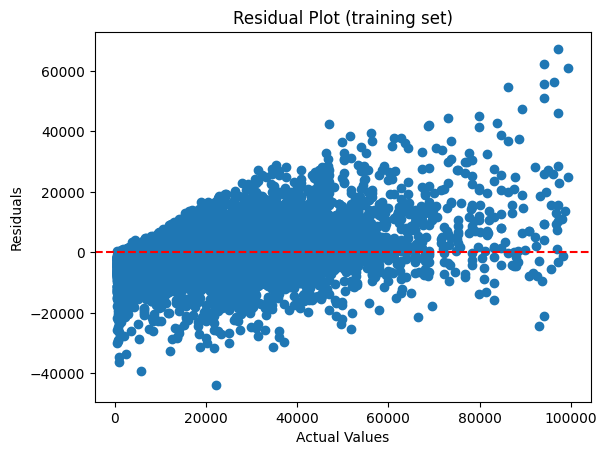

In [22]:
residuals = y_train - y_pred_train
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (training set)")
plt.show()

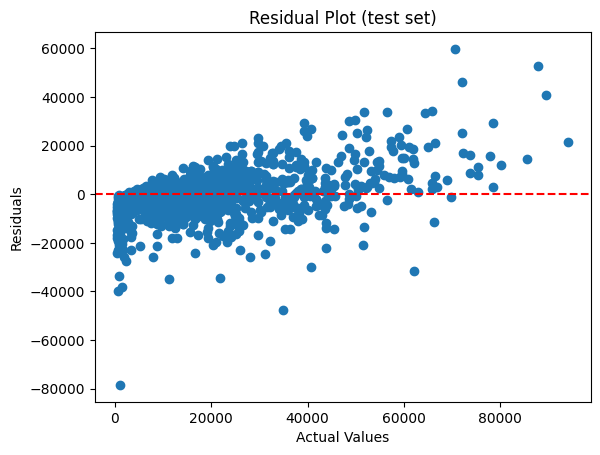

In [23]:
residuals = y_test - y_pred_test
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (test set)")
plt.show()